<h1>Machine Learning Project on Pneumonia Detection with Python</h1>

<p>This project aims to develop a machine learning model that can accurately identify pneumonia in chest X-rays. We will use a combination of deep learning techniques and transfer learning to achieve this goal.</p>



In [11]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
from pathlib import Path
from fastai.vision.all import *


<h2>Importing the Dataset Setting up Paths</h2>

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /Users/ranveerganna/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [13]:
path = Path("/Users/ranveerganna/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray")

<h2>Loading the Data for Training</h2>

In [ ]:
dls = ImageDataLoaders.from_folder(
    path/"train",    
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224),
)

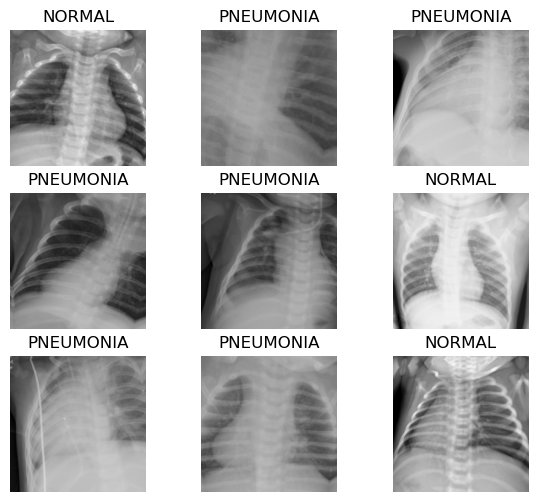

In [16]:
dls.show_batch(max_n=9, figsize=(7,6))

<h2>Using a ResNet50 Model for Transfer Learning</h2>

In [18]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/ranveerganna/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:28<00:00, 3.58MB/s]


In [19]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

KeyboardInterrupt: 

<h2>Training the Model</h2>

In [20]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: MPS backend out of memory (MPS allocated: 8.96 GB, other allocations: 128.47 MB, max allowed: 9.07 GB). Tried to allocate 98.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

<h2>Testing the Model</h2>

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
img = open_image('IM-0001-0001.jpeg')
print(learn.predict(img)[0])